# Potato Project Phase 3
#### Thi Nguyen, 862051496
#### Sydney Pun 862053259
#### Heng Tan 862155921

## Loading the Datasets:

We will first load the Forest Fires in Australia (fire_archive_M6_96619) dataset.

In [1]:
import pandas as pd
import numpy as np
#import nbimporter
#import Australian_Dataset_Analysis.ipynb

# %run Australian_Dataset_Analysis.ipynb

Aus_Fires_df = pd.read_csv('Australian_Wildfires.csv')
Aus_Fires_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [2]:
Aus_Fires_df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,1.776382e-15,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


## Setting Up the Model

In [3]:
acq_date_categories = { '2019-08-01':'801',   '2019-08-02':'802',   '2019-08-03':'803',
                        '2019-08-04':'804',   '2019-08-05':'805',   '2019-08-06':'806',
                        '2019-08-07':'807',   '2019-08-08':'808',   '2019-08-09':'809',
                        '2019-08-10':'810',   '2019-08-11':'811',   '2019-08-12':'812',
                        '2019-08-13':'813',   '2019-08-14':'814',   '2019-08-15':'815',
                       
                        '2019-08-16':'816',  '2019-08-17':'817',  '2019-08-18':'818',
                        '2019-08-19':'819',  '2019-08-20':'820',  '2019-08-21':'821',
                        '2019-08-22':'822',  '2019-08-23':'823',  '2019-08-24':'824',
                        '2019-08-25':'825',  '2019-08-26':'826',  '2019-08-27':'827',
                        '2019-08-28':'828',  '2019-08-29':'829',  '2019-08-30':'830',
                        '2019-08-31':'831',
                       
                        '2019-09-01':'901',  '2019-09-02':'901',  '2019-09-03':'903',
                        '2019-09-04':'904',  '2019-09-05':'904',  '2019-09-06':'906',
                        '2019-09-07':'907',  '2019-09-08':'907',  '2019-09-09':'909',
                        '2019-09-10':'910',  '2019-09-11':'910',  '2019-09-12':'912',
                        '2019-09-13':'913',  '2019-09-14':'913',  '2019-09-15':'915',
                       
                        '2019-09-16':'916', '2019-09-17':'916', '2019-09-18':'918',
                        '2019-09-19':'919', '2019-09-20':'919', '2019-09-21':'921',
                        '2019-09-22':'922', '2019-09-23':'922', '2019-09-24':'924',
                        '2019-09-25':'925', '2019-09-26':'925', '2019-09-27':'927',
                        '2019-09-28':'928', '2019-09-29':'928', '2019-09-30':'930' }

Aus_Fires_df['acq_date'] = [acq_date_categories[x] for x in Aus_Fires_df['acq_date']]
Aus_Fires_df['acq_date'] = pd.to_numeric(Aus_Fires_df['acq_date'])
Aus_Fires_df['acq_date'].value_counts()

907    2275
910    2206
913    1874
909    1230
906    1200
916    1111
904    1053
928    1045
811     988
912     940
901     935
915     932
812     869
802     810
820     797
919     788
813     785
922     683
930     669
814     641
925     638
821     636
903     614
822     610
810     608
829     575
809     554
828     546
806     538
804     528
819     508
816     491
823     484
807     476
830     474
927     455
924     454
803     425
827     421
801     418
918     414
805     396
815     389
818     375
824     346
831     344
826     325
825     306
817     300
808     291
921     241
Name: acq_date, dtype: int64

In [4]:
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-01', '801')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-02', '802')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-03', '803')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-04', '804')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-05', '805')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-06', '806')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-07', '807')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-08', '808')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-09', '809')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-10', '810')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-11', '811')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-12', '812')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-13', '813')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-14', '814')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-15', '815')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-16', '816')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-17', '817')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-18', '818')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-19', '819')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-20', '820')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-21', '821')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-22', '822')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-23', '823')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-24', '824')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-25', '825')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-26', '826')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-27', '827')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-28', '828')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-29', '829')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-30', '830')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-08-31', '831')

Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-01', '901')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-02', '902')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-03', '903')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-04', '904')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-05', '905')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-06', '906')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-07', '907')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-08', '908')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-09', '909')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-10', '910')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-11', '911')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-12', '912')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-13', '913')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-14', '914')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-15', '915')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-16', '916')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-17', '917')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-18', '918')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-19', '919')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-20', '920')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-21', '921')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-22', '922')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-23', '923')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-24', '924')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-25', '925')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-26', '926')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-27', '927')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-28', '928')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-29', '929')
Aus_Fires_df.acq_date = Aus_Fires_df.acq_date.replace('2019-09-30', '930')

Aus_Fires_df.acq_date.value_counts()

907    2275
910    2206
913    1874
909    1230
906    1200
916    1111
904    1053
928    1045
811     988
912     940
901     935
915     932
812     869
802     810
820     797
919     788
813     785
922     683
930     669
814     641
925     638
821     636
903     614
822     610
810     608
829     575
809     554
828     546
806     538
804     528
819     508
816     491
823     484
807     476
830     474
927     455
924     454
803     425
827     421
801     418
918     414
805     396
815     389
818     375
824     346
831     344
826     325
825     306
817     300
808     291
921     241
Name: acq_date, dtype: int64

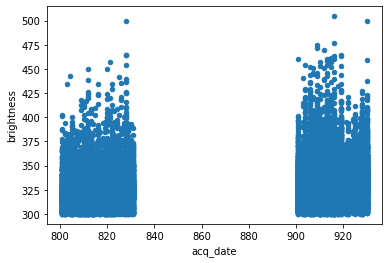

In [5]:
from sklearn.linear_model import LinearRegression

Aus_train = Aus_Fires_df.loc[:].copy()
Aus_test  = Aus_Fires_df.loc[:].copy()

X_train = Aus_train[["acq_date"]]
X_test  = Aus_test[["acq_date"]]
y_train = Aus_train["brightness"]

Aus_train.plot.scatter(x="acq_date", y="brightness")

In [16]:
y_train.shape
y_train.describe()

count    36011.000000
mean       328.750696
std         18.992808
min        300.000000
25%        316.500000
50%        326.400000
75%        336.700000
max        504.400000
Name: brightness, dtype: float64

In [17]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

array([324.46419854, 324.46419854, 324.46419854, ..., 332.58914039,
       332.58914039, 332.58914039])

In [18]:
model.coef_

array([0.06298405])

In [19]:
model.intercept_

274.01397818810085

## Fitting Linear Regression Model

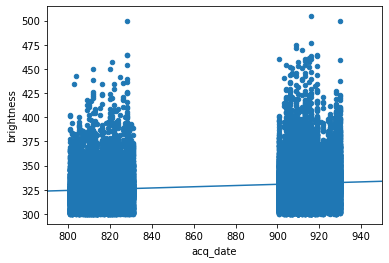

In [25]:
X_Aus = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_Aus["acq_date"] = np.linspace(790, 950, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_Aus = pd.Series(
    model.predict(X_Aus), # y values in Series.plot.line()
    index=X_Aus["acq_date"]    # x values in Series.plot.line()
)

# plot the data, then the model
Aus_train.plot.scatter(x="acq_date", y="brightness")
y_Aus.plot.line()

## Building Model Using Validation Set:

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

# pipeline and fit to training set
pipeline = make_pipeline(
    StandardScaler(),
    SGDRegressor()
)
pipeline.fit(X=X_train, y=y_train)
    
scores = cross_val_score(pipeline, 
                         X=X_train,
                         y=y_train,
                         cv=5)  # cv refers to number of cross-validation cuts
scores

array([-1.24116380e-03,  1.10495738e-03, -1.24851635e-02, -1.24080306e-04,
       -2.49290376e-05])

In [13]:
Y_predict = pipeline.predict(X=X_test)
#output = pd.DataFrame(data={"id":df_test.index,"ibu":Y_predict}) # first need to create df_test 
output = pd.DataFrame(data={"id":Aus_Fires_df.index,"frp":Y_predict}) 

output.to_csv(path_or_buf="Aus_results.csv",index=False,quoting=3,sep=',')